<a href="https://colab.research.google.com/github/MorshedulHoque/TensorFlow/blob/main/TensorFlow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import tensorflow

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # find the version number (should be 2.x+)

2.9.2


Creating Tensors with tf.constant()

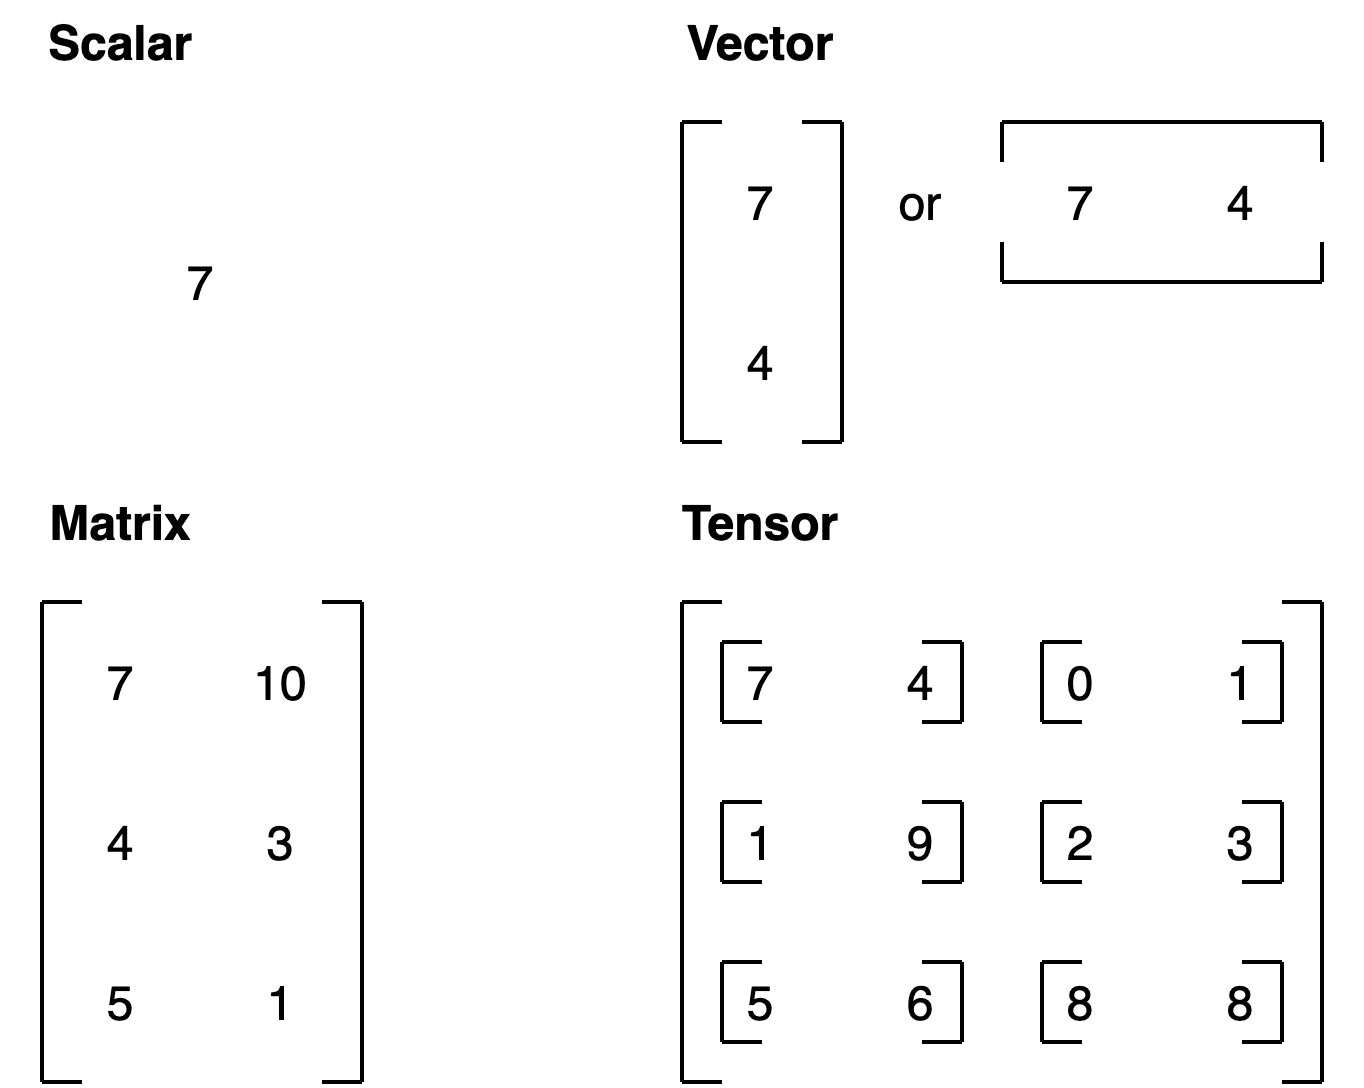

In [ ]:
scalar = tf.constant(8)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the number of dimensions of our vector tensor
vector.ndim

1

In [ ]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 10], 
                     [20, 20]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 10],
       [20, 20]], dtype=int32)>

In [ ]:
matrix.ndim

2

By default, TensorFlow creates tensors with either an int32 or float32 datatype.

This is known as [32-bit precision](https://en.wikipedia.org/wiki/Precision_(computer_science) (the higher the number, the more precise the number, the more space it takes up on computer).

In [ ]:
another_matrix = tf.constant([[10.5, 10], 
                              [20, 20.60],
                              [30, 30]], dtype = tf.float32)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[10.5, 10. ],
       [20. , 20.6],
       [30. , 30. ]], dtype=float32)>

In [ ]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim

2

In [ ]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[10, 10], 
                      [20, 20],
                      [30, 30]],
                     [[40, 40],
                     [50, 50],
                     [60, 60]]])
tensor

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[10, 10],
        [20, 20],
        [30, 30]],

       [[40, 40],
        [50, 50],
        [60, 60]]], dtype=int32)>

In [ ]:
tensor.ndim

3

# **Creating Tensors with tf.Variable()**

The difference between tf.Variable() and tf.constant() is tensors created with tf.constant() are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with tf.Variable() are mutable (can be changed).

In [ ]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 22])    # Variable's first should be capital
unchangable_tensor = tf.constant([20, 40])

changeable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10, 22], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([20, 40], dtype=int32)>)

In [ ]:
# Change the elements of the changable_tensor
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 7, 22], dtype=int32)>

In [ ]:
# Now let's try to change a value in a tf.constant() tensor.
unchangable_tensor[0].assign(7)
unchangable_tensor

AttributeError: ignored

# **Creating random tensors**

**How a network learns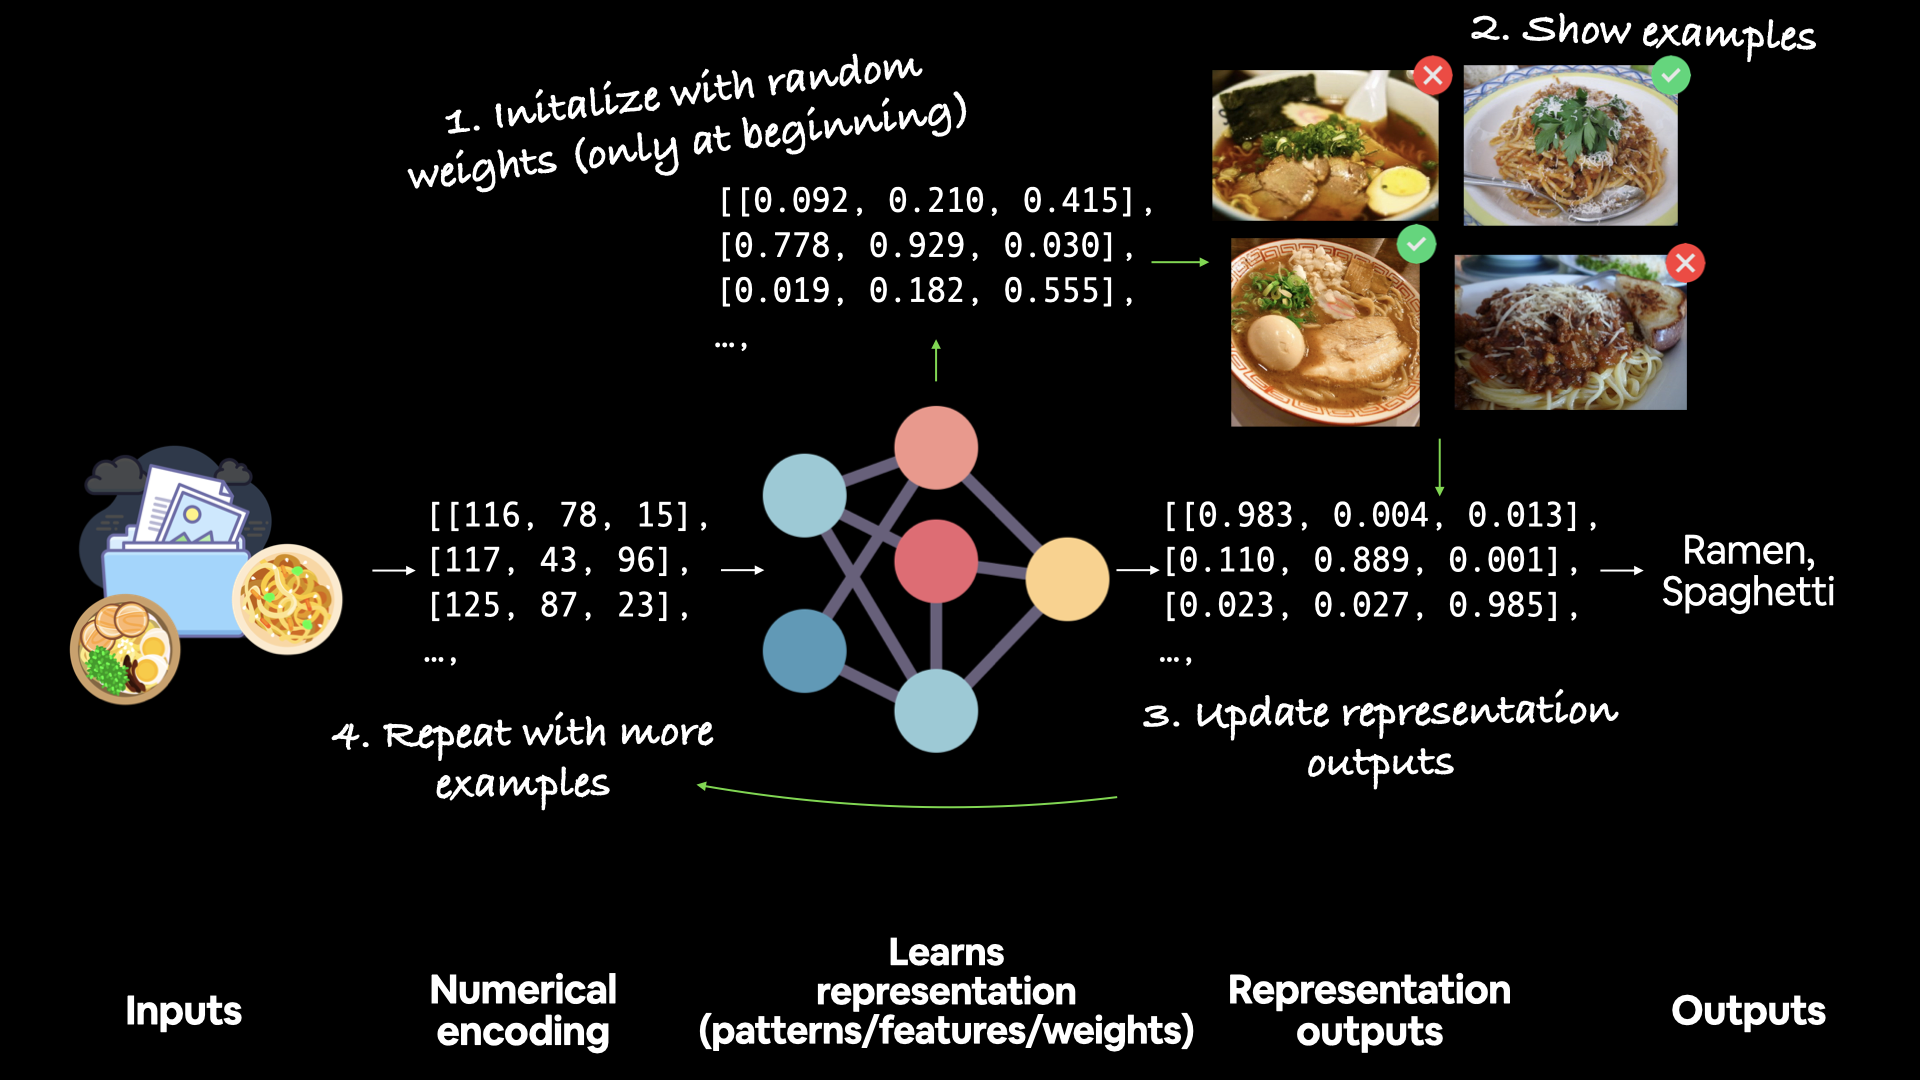**

A network learns by starting with random patterns (1) then going through demonstrative examples of data (2) whilst trying to update its random patterns to represent the examples (3).

**We can create random tensors by using the tf.random.Generator class.**

In [51]:
# Create two random (but the same) tensors
random1 = tf.random.Generator.from_seed(42)
random1 = random1.normal(shape=(3, 2))
random2 = tf.random.Generator.from_seed(42)
random2 = random2.normal(shape=(3,2))

random1, random2, random1 == random2    # the tensors are same because the seed value and the shape is same. Otherwise the will not same

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

In [55]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffle = tf.constant([[10, 11], 
                           [20, 22],
                           [30, 33]])
# Gets different results each time
tf.random.shuffle(not_shuffle)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10, 11],
       [30, 33],
       [20, 22]], dtype=int32)>

In [64]:
# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffle, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 22],
       [30, 33],
       [10, 11]], dtype=int32)>

In [67]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffle, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10, 11],
       [20, 22],
       [30, 33]], dtype=int32)>

In [79]:
# Set the global random seed
tf.random.set_seed(45) # if you comment this out you'll get different results

# Set the operation random seed
tf.random.shuffle(not_shuffle)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[30, 33],
       [10, 11],
       [20, 22]], dtype=int32)>

In [80]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [81]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [82]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


You can also index tensors just like Python lists.

In [83]:
# Get the first 2 items of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [86]:
# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [87]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])

# Get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

You can also add dimensions to your tensor whilst keeping the same information present using tf.newaxis.

In [88]:
# Add an extra dimension (to the end)
rank_3_tensor = rank_2_tensor[..., tf.newaxis]    # in Python "..." means "all dimensions prior to"
rank_2_tensor, rank_3_tensor    # shape (2, 2), shape (2, 2, 1)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>)

In [89]:
#You can achieve the same using tf.expand_dims().
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

# **Manipulating tensors (tensor operations)**

In [90]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [91]:
#Since we used tf.constant(), the original tensor is unchanged (the addition gets done on a copy).
# Original tensor unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [92]:
# Multiplication (known as element-wise multiplication)
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [93]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

In [94]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [95]:
# The original tensor is still unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

# **Matrix mutliplication**

The inner dimensions must match:


*   (3, 5) X (3, 5) won't work
*   (5, 3) X (3, 5) will work
*  (3, 5) X (5, 3) will work

The resulting matrix has the shape of the outer dimensions:


*   (5, 3) X (3, 5) -> (5, 5)
*   (3, 5) X (5, 3) -> (3, 3)




In [96]:
# Matrix multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [97]:
# Matrix multiplication with Python operator '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [98]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [99]:
X @ Y

InvalidArgumentError: ignored

**Let's try tf.reshape() first.**

In [100]:
# Example of reshape (3, 2) -> (2, 3)
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [101]:
# Try matrix multiplication with reshaped Y
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [102]:
# Example of transpose (3, 2) -> (2, 3)
tf.transpose(X)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]], dtype=int32)>

In [103]:
# Try matrix multiplication 
tf.matmul(tf.transpose(X), Y)
     

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [104]:
# You can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [105]:
# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [106]:
# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(Y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


# **Changing the datatype of a tensor**

In [107]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>)

In [108]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [109]:
# Change from int32 to float32
C = tf.cast(C, dtype=tf.float32)
C

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 7.], dtype=float32)>

**Getting the absolute value**

In [110]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [111]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

In [115]:
import numpy as np

# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([92, 22, 23,  5, 74, 94,  1, 40, 76, 25, 10, 86, 95, 74, 27, 15, 87,
        6, 31, 11, 15, 66, 37, 29, 94, 28, 75, 92, 36,  5, 43, 11, 89, 10,
       15, 47, 35, 98, 40, 61, 56, 95, 32, 37, 55, 44, 71, 36, 10, 70])>

In [116]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [117]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=98>

In [118]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=46>

In [119]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2326>

In [120]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.32416457, 0.99357729, 0.56879323, 0.75412627, 0.10494897,
       0.98703369, 0.97432872, 0.93998339, 0.96209153, 0.21969894,
       0.28324815, 0.13669606, 0.77241781, 0.88498737, 0.61010594,
       0.32457008, 0.43735684, 0.490581  , 0.54850698, 0.00537195,
       0.74438407, 0.29720211, 0.49047854, 0.43539928, 0.85388254,
       0.96863392, 0.62581728, 0.36774678, 0.60752533, 0.21329007,
       0.90014411, 0.69899963, 0.44218685, 0.69962036, 0.5711212 ,
       0.98937161, 0.08421478, 0.16793502, 0.97203804, 0.68407207,
       0.51178491, 0.10128479, 0.78460929, 0.99347264, 0.38015814,
       0.64923131, 0.3935116 , 0.02942791, 0.61303874, 0.59588729])>

In [121]:
# Find the maximum element position of F
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [122]:
# Find the minimum element position of F
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=19>

# **Squeezing a tensor (removing all single dimensions)**

In [123]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [124]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

In [127]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# One hot encode them
tf.one_hot(some_list, depth=5)

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)>

In [129]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

# **Exercise**

1. Create a vector, scalar, matrix and tensor with values of your choosing using tf.constant().

In [132]:
vector = tf.constant([5, 7])

scalar = tf.constant(10)

matrix = tf.constant([[2, 3],
                      [4, 6]])

tensor = tf.constant([[[2, 5],
                      [4, 7]],
                     [[5, 9],
                      [8, 10]]])

2. Find the shape, rank and size of the tensors you created in 1.

In [143]:
print("Shape of vector= ",vector.shape)
print("Shape of scalar= ",scalar.shape)
print("Shape of matrix= ",matrix.shape)
print("Shape of tensor= ",tensor.shape)

print("Rank of vector= ",vector.ndim)
print("Rank of scalar= ",scalar.ndim)
print("Rank of matrix= ",matrix.ndim)
print("Rank of tensor= ",tensor.ndim)

Shape of vector=  (2,)
Shape of scalar=  ()
Shape of matrix=  (2, 2)
Shape of tensor=  (2, 2, 2)
Rank of vector=  1
Rank of scalar=  0
Rank of matrix=  2
Rank of tensor=  3
